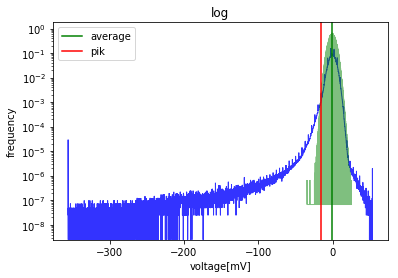

In [6]:
###########HISTO##LOG#########

plt.ylabel('frequency')
plt.xlabel('voltage[mV]')
plt.title('log')
n_signal, bins_signal, patches_signal = plt.hist(x0[1],bins=n,normed=1,log=True,alpha=0.8,color='b',histtype='step')
n_noise, bins_noise, patches_noise = plt.hist(x0noise[1],bins=nnoise,normed=1,log=True,alpha=0.5,color='g',histtype='step')
plt.axvline(x=average_full,color='g',label='average')
plt.axvline(x=pik,color='r',label='pik')
plt.legend(loc='upper left')
plt.show()

In [7]:
ran=bins_signal[1]-bins_signal[0]

cut_index= np.min(np.where(bins_signal>bins_noise[0]-ran/2))
cut_line=bins_signal[cut_index]

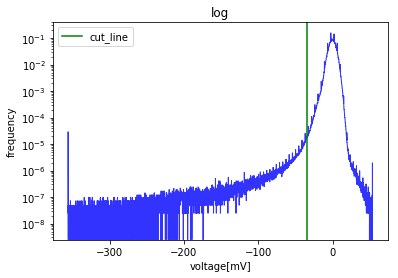

In [8]:
plt.hist(x0[1],bins=n,normed=1,log=True,alpha=0.8,color='b',histtype='step')

plt.ylabel('frequency')
plt.xlabel('voltage[mV]')
plt.title('log')
plt.axvline(x=cut_line,color='g',label='cut_line')
plt.legend(loc='upper left')
plt.show()

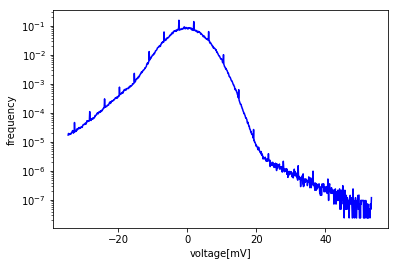

In [9]:
##############noise################

bins_signal_cut=bins_signal[cut_index:-1]
n_signal_cut=n_signal[cut_index:]

plt.plot(bins_signal_cut,n_signal_cut,'b')

plt.yscale('log')
plt.ylabel('frequency')
plt.xlabel('voltage[mV]')
plt.show()

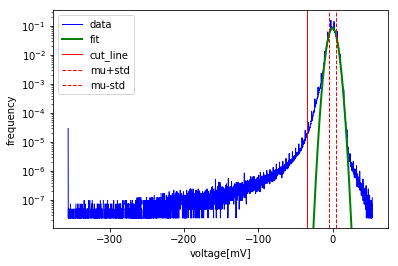

In [10]:
from scipy.optimize import curve_fit

def func(x, a,mi,sigma):
    return a * np.exp( - (x- mi)**2 / (2 * sigma**2) )
    
    
#mi=np.mean(n_signal_cut)
#sigma=np.std(n_signal_cut)
#print(mi,sigma)
#ygaus=func(bins_signal_cut, mi,sigma)
popt,pcov=curve_fit(func,bins_signal_cut, n_signal_cut)
n_signal_fit=func(bins_signal_cut, *popt)

mi=popt[1]
sigma=popt[2]

plt.plot(bins_signal[:-1],n_signal,'b',lw=1,label='data')
plt.plot(bins_signal_cut,n_signal_fit, 'g',lw=2,label='fit')

plt.axvline(x=cut_line,color='r',label='cut_line',lw=1)
plt.axvline(x=mi+sigma,color='r',label='mu+std',linestyle='--',lw=1)
plt.axvline(x=mi-sigma,color='r',label='mu-std',linestyle='--',lw=1)

plt.ylabel('frequency')
plt.xlabel('voltage[mV]')
plt.yscale('log')
plt.ylim(1.1142660877934673e-08, 0.349659005879943)
plt.legend()
plt.show()

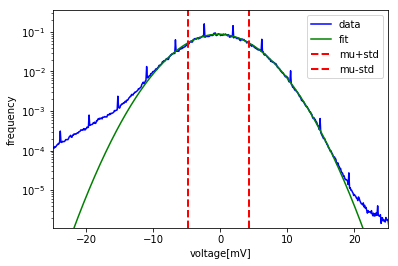

In [11]:
plt.plot(bins_signal_cut,n_signal_cut,'b',label='data')
plt.plot(bins_signal_cut,n_signal_fit, 'g',label='fit')


plt.axvline(x=mi+sigma,color='r',label='mu+std',linestyle='--',lw=2)
plt.axvline(x=mi-sigma,color='r',label='mu-std',linestyle='--',lw=2)

plt.ylabel('frequency')
plt.xlabel('voltage[mV]')
plt.yscale('log')
plt.ylim(1.1142660877934673e-06, 0.349659005879943)
plt.xlim(-25,25)
plt.legend()
plt.show()

In [13]:
################NEW FIT##############
#####################################
    
cut_index_min_vol2= np.min(np.where(bins_signal>mi-3*sigma-ran/2))
       
cut_index_max_vol2= np.min(np.where(bins_signal>mi+3*sigma-ran/2))
        
bins_signal_cut_vol2=bins_signal[cut_index_min_vol2 : cut_index_max_vol2]
n_signal_cut_vol2=n_signal[cut_index_min_vol2 : cut_index_max_vol2]


def func(x, a,mi,sigma):
    return a * np.exp( - (x- mi)**2 / (2 * sigma**2) )

popt2,pcov2=curve_fit(func,bins_signal_cut_vol2, n_signal_cut_vol2)
n_signal_fit_vol2=func(bins_signal_cut, *popt)

mi2=popt2[1]
sigma2=popt2[2]

print("mi_fit_1: ",mi)
print("mi_fit_2: ",mi2)
print("sigma_fit_1: ",sigma)
print("sigma_fit_2: ",sigma2)


mi_fit_1:  -0.28102849652352113
mi_fit_2:  -0.2804877670411463
sigma_fit_1:  4.543078344874913
sigma_fit_2:  4.541292160185224


In [17]:
##################back voltage#############

back_voltage=bins_signal_cut[np.min(np.where(n_signal_cut<=n_signal_fit_vol2))]
print("back voltage: ",back_voltage,"mV")

back voltage:  -9.465371661326571 mV


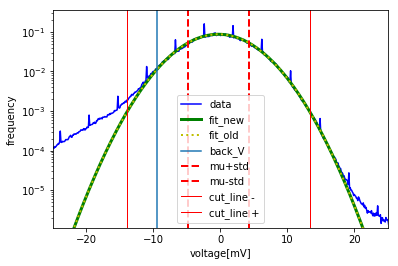

In [19]:
plt.plot(bins_signal_cut,n_signal_cut,'b',label='data')
plt.plot(bins_signal_cut,n_signal_fit_vol2, 'g',label='fit_new',lw=3)
plt.plot(bins_signal_cut,n_signal_fit, 'y',label='fit_old',lw=2,linestyle=':')

plt.axvline(x=back_voltage,label='back_V')

plt.axvline(x=mi2+sigma2,color='r',label='mu+std',linestyle='--',lw=2)
plt.axvline(x=mi2-sigma2,color='r',label='mu-std',linestyle='--',lw=2)
plt.axvline(x=mi-3*sigma,color='r',label='cut_line -',lw=1)
plt.axvline(x=mi+3*sigma,color='r',label='cut_line +',lw=1)

plt.ylabel('frequency')
plt.xlabel('voltage[mV]')
plt.yscale('log')
plt.ylim(1.1142660877934673e-06, 0.349659005879943)
plt.xlim(-25,25)
plt.legend()
plt.show()